In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from datetime import datetime

In [16]:
df1 = pd.read_csv('357164042518400_OLs.csv', delimiter=';', names=["Sensor_id", "Channel", "Device_id", "Latitude",
                                                                    "Longitude", "Speed", "Date", "Time", "Channel1", "Channel2"])
df1

,Sensor_id,Channel,Device_id,Latitude,Longitude,Speed,Date,Time,Channel1,Channel2
0,60040,CANALE1,357164042518400,59.374611,17.997831,0.0,20210304,41113,11200,4736
1,60040,CANALE1,357164042518400,59.374611,17.997852,0.0,20210304,41113,-11265,511
2,60040,CANALE1,357164042518400,59.374611,17.997877,0.0,20210304,41114,12464,2303
3,60040,CANALE1,357164042518400,59.374610,17.997900,0.0,20210304,41114,-11265,511
4,60040,CANALE1,357164042518400,59.374609,17.997925,0.0,20210304,41114,11644,1464
...,...,...,...,...,...,...,...,...,...,...
12600,61040,CANALE2,357164042518400,59.376685,17.991453,0.0,20211108,23941,-2305,-11247
12601,61040,CANALE2,357164042518400,59.376677,17.991481,0.0,20211108,23941,-656,11472
12602,61040,CANALE2,357164042518400,59.376670,17.991506,0.0,20211108,23941,-560,-11272
12603,61040,CANALE2,357164042518400,59.376638,17.991621,0.0,20211108,23943,-832,11136


The acquired value is an integer number `[digit]` between 32768 and -32768. It can be converted
into a stress load using the sensitivity of 0.0068 `[MPa/digit]`. The absolute value is much more
important than the integer.

In [17]:
df1[['Channel1', 'Channel2']] = df1[['Channel1', 'Channel2']].apply(lambda x: abs(x * 0.0068), axis=1)
df1

,Sensor_id,Channel,Device_id,Latitude,Longitude,Speed,Date,Time,Channel1,Channel2
0,60040,CANALE1,357164042518400,59.374611,17.997831,0.0,20210304,41113,76.1600,32.2048
1,60040,CANALE1,357164042518400,59.374611,17.997852,0.0,20210304,41113,76.6020,3.4748
2,60040,CANALE1,357164042518400,59.374611,17.997877,0.0,20210304,41114,84.7552,15.6604
3,60040,CANALE1,357164042518400,59.374610,17.997900,0.0,20210304,41114,76.6020,3.4748
4,60040,CANALE1,357164042518400,59.374609,17.997925,0.0,20210304,41114,79.1792,9.9552
...,...,...,...,...,...,...,...,...,...,...
12600,61040,CANALE2,357164042518400,59.376685,17.991453,0.0,20211108,23941,15.6740,76.4796
12601,61040,CANALE2,357164042518400,59.376677,17.991481,0.0,20211108,23941,4.4608,78.0096
12602,61040,CANALE2,357164042518400,59.376670,17.991506,0.0,20211108,23941,3.8080,76.6496
12603,61040,CANALE2,357164042518400,59.376638,17.991621,0.0,20211108,23943,5.6576,75.7248


In [18]:
df1['Time'] = df1['Time'].apply(lambda x: str(datetime.strptime(str(x), "%H%M%S").time()))
df1['Date'] = df1['Date'].apply(lambda x: str(datetime.strptime(str(x), "%Y%m%d").date()))
df1

,Sensor_id,Channel,Device_id,Latitude,Longitude,Speed,Date,Time,Channel1,Channel2
0,60040,CANALE1,357164042518400,59.374611,17.997831,0.0,2021-03-04,04:11:13,76.1600,32.2048
1,60040,CANALE1,357164042518400,59.374611,17.997852,0.0,2021-03-04,04:11:13,76.6020,3.4748
2,60040,CANALE1,357164042518400,59.374611,17.997877,0.0,2021-03-04,04:11:14,84.7552,15.6604
3,60040,CANALE1,357164042518400,59.374610,17.997900,0.0,2021-03-04,04:11:14,76.6020,3.4748
4,60040,CANALE1,357164042518400,59.374609,17.997925,0.0,2021-03-04,04:11:14,79.1792,9.9552
...,...,...,...,...,...,...,...,...,...,...
12600,61040,CANALE2,357164042518400,59.376685,17.991453,0.0,2021-11-08,23:09:41,15.6740,76.4796
12601,61040,CANALE2,357164042518400,59.376677,17.991481,0.0,2021-11-08,23:09:41,4.4608,78.0096
12602,61040,CANALE2,357164042518400,59.376670,17.991506,0.0,2021-11-08,23:09:41,3.8080,76.6496
12603,61040,CANALE2,357164042518400,59.376638,17.991621,0.0,2021-11-08,23:09:43,5.6576,75.7248


In [19]:
overloads = np.max(df1[['Channel1', 'Channel2']].values, axis=1)
overloads[overloads > 85].shape

(3772,)

## Calculate distances

In [20]:
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r)
     
     
# driver code
lat1 = 53.32055555555556
lat2 = 53.31861111111111
lon1 = -1.7297222222222221
lon2 =  -1.6997222222222223
print(distance(lat1, lat2, lon1, lon2), "K.M")

2.0043678382716137 K.M


In [21]:
a = np.sqrt(np.sum((np.array([lat1, lon1]) - np.array([lat2, lon2]))**2))
b = distance(lat1, lat2, lon1, lon2) * 1000

five_meter_degree = (5 * a) / b
print(five_meter_degree)

7.49935909658473e-05


In [22]:
from sklearn.cluster import MeanShift

mean_shift = MeanShift(bandwidth=five_meter_degree)

We cluster the coordinates in each day

In [23]:
# first calculate for one day
coordinates = df1[['Latitude', 'Longitude']].values

In [24]:
mean_shift.fit(coordinates)
mean_shift.labels_

array([ 76,  76,  76, ..., 275, 714, 833])

In [25]:
np.unique(mean_shift.labels_)

array([   0,    1,    2, ..., 1077, 1078, 1079])

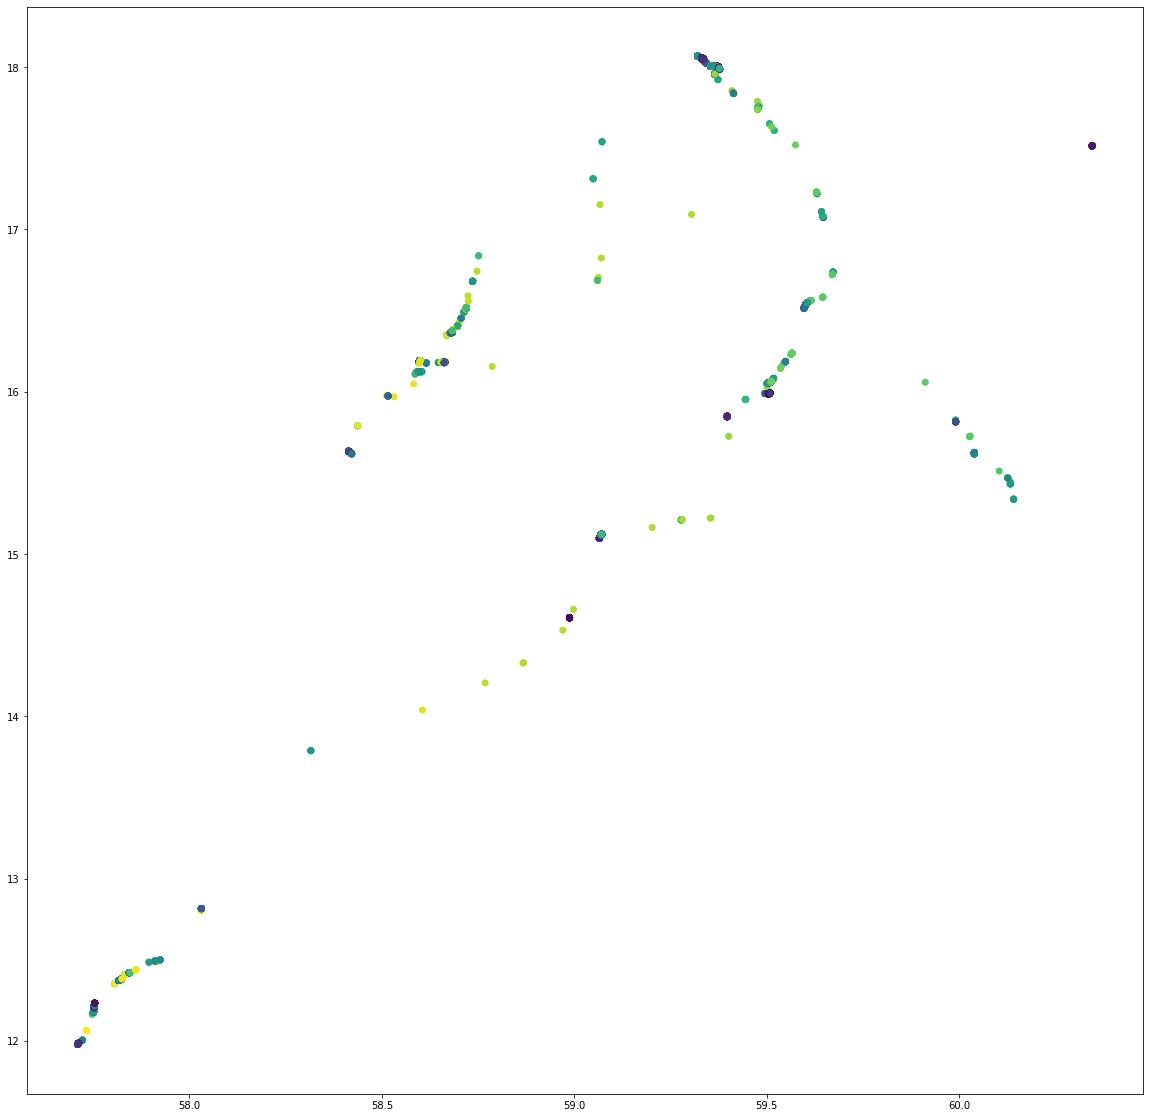

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 20))
# coordinates = df1[['Latitude', 'Longitude']].values
plt.scatter(coordinates[:, 0], coordinates[:, 1], c=mean_shift.labels_)
plt.show()

In [27]:
df1['5m_cluster'] = mean_shift.labels_
df1

,Sensor_id,Channel,Device_id,Latitude,Longitude,Speed,Date,Time,Channel1,Channel2,5m_cluster
0,60040,CANALE1,357164042518400,59.374611,17.997831,0.0,2021-03-04,04:11:13,76.1600,32.2048,76
1,60040,CANALE1,357164042518400,59.374611,17.997852,0.0,2021-03-04,04:11:13,76.6020,3.4748,76
2,60040,CANALE1,357164042518400,59.374611,17.997877,0.0,2021-03-04,04:11:14,84.7552,15.6604,76
3,60040,CANALE1,357164042518400,59.374610,17.997900,0.0,2021-03-04,04:11:14,76.6020,3.4748,76
4,60040,CANALE1,357164042518400,59.374609,17.997925,0.0,2021-03-04,04:11:14,79.1792,9.9552,76
...,...,...,...,...,...,...,...,...,...,...,...
12600,61040,CANALE2,357164042518400,59.376685,17.991453,0.0,2021-11-08,23:09:41,15.6740,76.4796,275
12601,61040,CANALE2,357164042518400,59.376677,17.991481,0.0,2021-11-08,23:09:41,4.4608,78.0096,275
12602,61040,CANALE2,357164042518400,59.376670,17.991506,0.0,2021-11-08,23:09:41,3.8080,76.6496,275
12603,61040,CANALE2,357164042518400,59.376638,17.991621,0.0,2021-11-08,23:09:43,5.6576,75.7248,714


•
It’s interesting to monitor the variation of the overloads during time; whether the values
increase, decrease or remain constant

In [28]:
df1['']

,Sensor_id,Channel,Device_id,Latitude,Longitude,Speed,Date,Time,Channel1,Channel2,5m_cluster
0,60040,CANALE1,357164042518400,59.374611,17.997831,0.0,2021-03-04,04:11:13,76.1600,32.2048,76
1,60040,CANALE1,357164042518400,59.374611,17.997852,0.0,2021-03-04,04:11:13,76.6020,3.4748,76
2,60040,CANALE1,357164042518400,59.374611,17.997877,0.0,2021-03-04,04:11:14,84.7552,15.6604,76
3,60040,CANALE1,357164042518400,59.374610,17.997900,0.0,2021-03-04,04:11:14,76.6020,3.4748,76
4,60040,CANALE1,357164042518400,59.374609,17.997925,0.0,2021-03-04,04:11:14,79.1792,9.9552,76
...,...,...,...,...,...,...,...,...,...,...,...
12600,61040,CANALE2,357164042518400,59.376685,17.991453,0.0,2021-11-08,23:09:41,15.6740,76.4796,275
12601,61040,CANALE2,357164042518400,59.376677,17.991481,0.0,2021-11-08,23:09:41,4.4608,78.0096,275
12602,61040,CANALE2,357164042518400,59.376670,17.991506,0.0,2021-11-08,23:09:41,3.8080,76.6496,275
12603,61040,CANALE2,357164042518400,59.376638,17.991621,0.0,2021-11-08,23:09:43,5.6576,75.7248,714


In [90]:
# df2 = pd.read_csv('357164042518400_THs.csv', delimiter=';')
# df2
np.loadtxt('357164042518400_THs.csv', delimiter=';', dtype=np.object0)

ValueError: Wrong number of columns at line 2